# FIFA 2022 Data Prediction of players release cluse  
## Data Science Fundementals  (TDS 2101) 
### Assignment 1
#### by Amin Ahmed Mohammedelhassan (1191302190)
# 

###### used packges 

In [1]:
import numpy as np
import pandas as pd

import requests

import cv2

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importing the Dataset 

In [2]:
df = pd.read_csv('players_22.csv', low_memory=False)

###### creating a backup copy of the data

In [3]:
backup = df


# Exploring the Data 

###### Reviewing the data  

In [4]:
df.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [5]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [6]:
df.shape

(19239, 110)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [8]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

###### deleting unuseful columns for our Analysis

In [9]:
unuseful = ['player_url','club_logo_url','club_flag_url','nation_logo_url',
            'player_traits', 'player_tags','club_loaned_from','club_joined',
           'nation_team_id','nation_position','nation_jersey_number']
for un in unuseful:
    del df[un]

###### check if there are any duplicated raws 

In [10]:
duplicate  = df.duplicated()
check = 'there is no duplicated raws'
for dup in duplicate:
    if dup == True:
        "there is some duplicated raws"
print(check)

there is no duplicated raws


In [11]:
if not df.duplicated().any():
    print("There are no duplicated rows.")
else:
    print("there is some duplicated raws")

There are no duplicated rows.


###### Counting all the Null values for each column

In [12]:
null_counter = pd.DataFrame()
null_counter['number of null'] = df.isnull().sum()
null_counter = null_counter[null_counter['number of null'] > 0]
null_counter

,number of null
value_eur,74
wage_eur,61
club_team_id,61
club_name,61
league_name,61
league_level,61
club_position,61
club_jersey_number,61
club_contract_valid_until,61
release_clause_eur,1176


# cleaning the data

 ###### extracting leagues information

In [13]:
league_info = pd.DataFrame()
league_info['league_name'] = df['league_name']
league_info['league_level'] = df['league_level']
league_info = league_info.drop_duplicates().dropna()
league_info.count()

league_name     55
league_level    55
dtype: int64

###### extracting clubs information 

In [14]:
clubs_info = pd.DataFrame()
clubs_info['club_team_id'] = df['club_team_id']
clubs_info['club_name'] = df['club_name']
clubs_info = clubs_info.drop_duplicates().dropna()
clubs_info.count()

club_team_id    701
club_name       701
dtype: int64

###### replaceing the pace of all goalkeppers with there goalkeeping speed

In [15]:
gk_data = df[df['player_positions'] == 'GK']
gk_data['pace'] = gk_data['goalkeeping_speed']


C:\Users\amins\AppData\Local\Temp\ipykernel_5276\2694498993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_data['pace'] = gk_data['goalkeeping_speed']


###### since the player shooting, passing, dribbling, defending and physic needs be magerd with real world data it cant be predected or normailze by using any calcuation becuse it is a unique postion so it will be replaced with zeros

In [16]:
gk_power_list = ['pace','shooting', 'passing', 'dribbling', 'defending', 'physic','goalkeeping_speed']
for power in gk_power_list:        
    gk_data[power] = gk_data[power].fillna(0)
gk_data

C:\Users\amins\AppData\Local\Temp\ipykernel_5276\1050064867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_data[power] = gk_data[power].fillna(0)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,nation_flag_url
5,200389,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,1993-01-07,...,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/flags/si.png
7,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,1986-03-27,...,43+3,37+3,35+3,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/flags/de.png
8,192448,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,1992-04-30,...,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/flags/de.png
12,192119,T. Courtois,Thibaut Courtois,GK,89,91,85500000.0,250000.0,29,1992-05-11,...,31+3,29+3,29+3,29+3,29+3,29+3,29+3,86+3,https://cdn.sofifa.net/players/192/119/22_120.png,https://cdn.sofifa.net/flags/be.png
18,210257,Ederson,Ederson Santana de Moraes,GK,89,91,94000000.0,200000.0,27,1993-08-17,...,44+3,37+3,36+3,35+3,35+3,35+3,36+3,87+3,https://cdn.sofifa.net/players/210/257/22_120.png,https://cdn.sofifa.net/flags/br.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,261958,Gao Xiang,高翔,GK,48,54,60000.0,800.0,20,2000-08-10,...,19+2,17+2,17+2,21+2,21+2,21+2,17+2,47+2,https://cdn.sofifa.net/players/261/958/22_120.png,https://cdn.sofifa.net/flags/cn.png
19216,263340,H. Wiles-Richards,Harvey Wiles-Richards,GK,48,65,110000.0,1000.0,19,2002-05-27,...,21+2,20+2,19+2,20+2,20+2,20+2,19+2,47+2,https://cdn.sofifa.net/players/263/340/22_120.png,https://cdn.sofifa.net/flags/gb-eng.png
19225,259213,D. Da Silva,Dylan Da Silva,GK,47,55,90000.0,500.0,21,2000-04-04,...,20+2,18+2,18+2,19+2,19+2,19+2,18+2,46+2,https://cdn.sofifa.net/players/259/213/22_120.png,https://cdn.sofifa.net/flags/in.png
19227,259646,A. Shaikh,Arsh Shaikh,GK,47,67,110000.0,500.0,18,2002-07-09,...,18+2,16+2,16+2,17+2,17+2,17+2,16+2,46+2,https://cdn.sofifa.net/players/259/646/22_120.png,https://cdn.sofifa.net/flags/in.png


###### combining the data frames

In [17]:
 df = df.combine_first(gk_data)

###### looking for players who doesn't have clubs

In [18]:
club_info_list = df.loc[:, df.columns.str.contains( 'club', case=False, na=False) ]

free_players = df
free_players['index'] = free_players['club_team_id'].notnull()
free_players = free_players[free_players['index'] == False ]

for info in club_info_list:
    del free_players[info]
del free_players['value_eur']
del free_players['wage_eur']
del free_players['league_name']
del free_players['league_level']
free_players

,sofifa_id,short_name,long_name,player_positions,overall,potential,age,dob,height_cm,weight_kg,...,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,nation_flag_url,index
147,184087,T. Alderweireld,Toby Alderweireld,CB,83,83,32,1989-03-02,186,81,...,77+3,78+3,82+1,82+1,82+1,78+3,21+3,https://cdn.sofifa.net/players/184/087/22_120.png,https://cdn.sofifa.net/flags/be.png,False
416,197242,G. Krychowiak,Grzegorz Krychowiak,"CDM, CM",80,80,31,1990-01-29,187,84,...,74+3,74+3,77+3,77+3,77+3,74+3,18+3,https://cdn.sofifa.net/players/197/242/22_120.png,https://cdn.sofifa.net/flags/pl.png,False
694,187607,A. Dzyuba,Artem Dzyuba,ST,78,78,32,1988-08-22,196,91,...,53+2,50+2,50+2,50+2,50+2,50+2,18+2,https://cdn.sofifa.net/players/187/607/22_120.png,https://cdn.sofifa.net/flags/ru.png,False
926,200094,M. Ozdoev,Magomed Ozdoev,"CDM, CM",77,78,28,1992-11-05,184,78,...,74+2,73+2,73+2,73+2,73+2,73+2,19+2,https://cdn.sofifa.net/players/200/094/22_120.png,https://cdn.sofifa.net/flags/ru.png,False
1146,154950,Y. Zhirkov,Yuriy Zhirkov,"LB, LM",76,76,37,1983-08-20,180,75,...,75+1,74+2,72+2,72+2,72+2,74+2,15+2,https://cdn.sofifa.net/players/154/950/22_120.png,https://cdn.sofifa.net/flags/ru.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,183122,B. Sævarsson,Birkir Már Sævarsson,RB,63,63,36,1984-11-11,187,74,...,61+2,61+2,62+1,62+1,62+1,61+2,18+2,https://cdn.sofifa.net/players/183/122/22_120.png,https://cdn.sofifa.net/flags/is.png,False
12891,245685,O. Valakari,Onni Johannes Simonpoika Valakari,"CM, CAM",63,68,21,1999-08-18,187,82,...,57+2,56+2,53+2,53+2,53+2,56+2,14+2,https://cdn.sofifa.net/players/245/685/22_120.png,https://cdn.sofifa.net/flags/fi.png,False
14199,259680,M. Stamenic,Marko Seufatu Nikola Stamenic,"CM, CDM, CAM",62,80,19,2002-02-19,188,78,...,58+2,57+2,56+2,56+2,56+2,57+2,15+2,https://cdn.sofifa.net/players/259/680/22_120.png,https://cdn.sofifa.net/flags/nz.png,False
14466,213094,S. Roux,Storm Roux,RB,61,61,28,1993-01-13,181,71,...,59+2,59+2,58+2,58+2,58+2,59+2,16+2,https://cdn.sofifa.net/players/213/094/22_120.png,https://cdn.sofifa.net/flags/nz.png,False


###### removing the free players from the orignal data set to get red of there nan values 

In [19]:
df_cleaned = pd.DataFrame()
df_cleaned = df.merge(free_players, indicator=True, how='outer').query('_merge=="left_only"').drop(columns=['_merge'])
df_cleaned.shape

(19178, 100)

###### remving goal keeping speed boecuse it is either duplicated from pace column or the player is not a goalkeaper

In [20]:
del df_cleaned['goalkeeping_speed']

###### filling the value_eur with zeros sence having nan means the value = 0

In [21]:
df_cleaned['value_eur'] = df_cleaned['value_eur'].fillna(0)
df.shape

(19239, 100)

# Relations between columns

###### players who has high potential

In [22]:
pt = pd.DataFrame()
pt['overall'] = df['overall']
pt['potential'] = df['potential']
pt['age'] = df['age']
pt

,overall,potential,age
0,93,93,34
1,92,92,32
2,91,91,36
3,91,91,29
4,91,91,30
...,...,...,...
19234,47,52,22
19235,47,59,19
19236,47,55,21
19237,47,60,19


###### players who has high difference between their potential and the overall rating

In [23]:
dp = pd.DataFrame() # diffrence in potential
dp['id'] = df['sofifa_id']
dp['age'] = df['age']
dp['potential_defrence'] = df['potential'] - df['overall']
dp = dp.sort_values(by = ['potential_defrence'], ascending= False )

dp['potential_defrence'] = (( dp['potential_defrence']-  dp['potential_defrence'].min())/
                            dp['potential_defrence'].max()-dp['potential_defrence'].min() ) *99 +1


dp


,id,age,potential_defrence
18936,260982,17,100.000000
18510,256556,17,96.192308
16326,260192,17,96.192308
18227,254819,16,96.192308
17414,264180,16,96.192308
...,...,...,...
4677,189661,30,1.000000
4678,189703,31,1.000000
4679,189930,31,1.000000
4680,190058,31,1.000000


In [24]:
wv = pd.DataFrame()
wv['wage'] = df['wage_eur']
wv['vlaue'] = df['value_eur']
wv.vlaue = (( wv.vlaue -  wv.vlaue.min()) / (wv.vlaue.max()-wv.vlaue.min()) ) * 99 +1
wv.wage = (( wv.wage -  wv.wage.min()) / (wv.wage.max()-wv.wage.min()) ) * 99 +1
wv = wv[wv['wage'] < 100]

# web scraping for images 

###### identify all the columns that contains urls

In [25]:
all_urls = pd.DataFrame()
all_urls['url'] = df.columns
all_urls['index'] = all_urls['url'].str.find("url")
all_urls = all_urls[all_urls['index'] !=-1]
del all_urls['index']
print(all_urls)

                url
97  player_face_url
98  nation_flag_url


###### downloading the images from the urls

In [26]:
def player_face(player):
    
    response = requests.get(player['player_face_url'])
    
    if response.status_code == 200:
    # success
        arr = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        #print(link)
    else:
    # handle error
        print(response.status_code)
    return img

In [27]:

def nation_flag(player):
    
    response = requests.get(player['nation_flag_url'])
    
    if response.status_code == 200:
    # success
        arr = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        #print(link)
    else:
    # handle error
        print(response.status_code)
    return img


# data visualizations

looking for corrleation using heat map

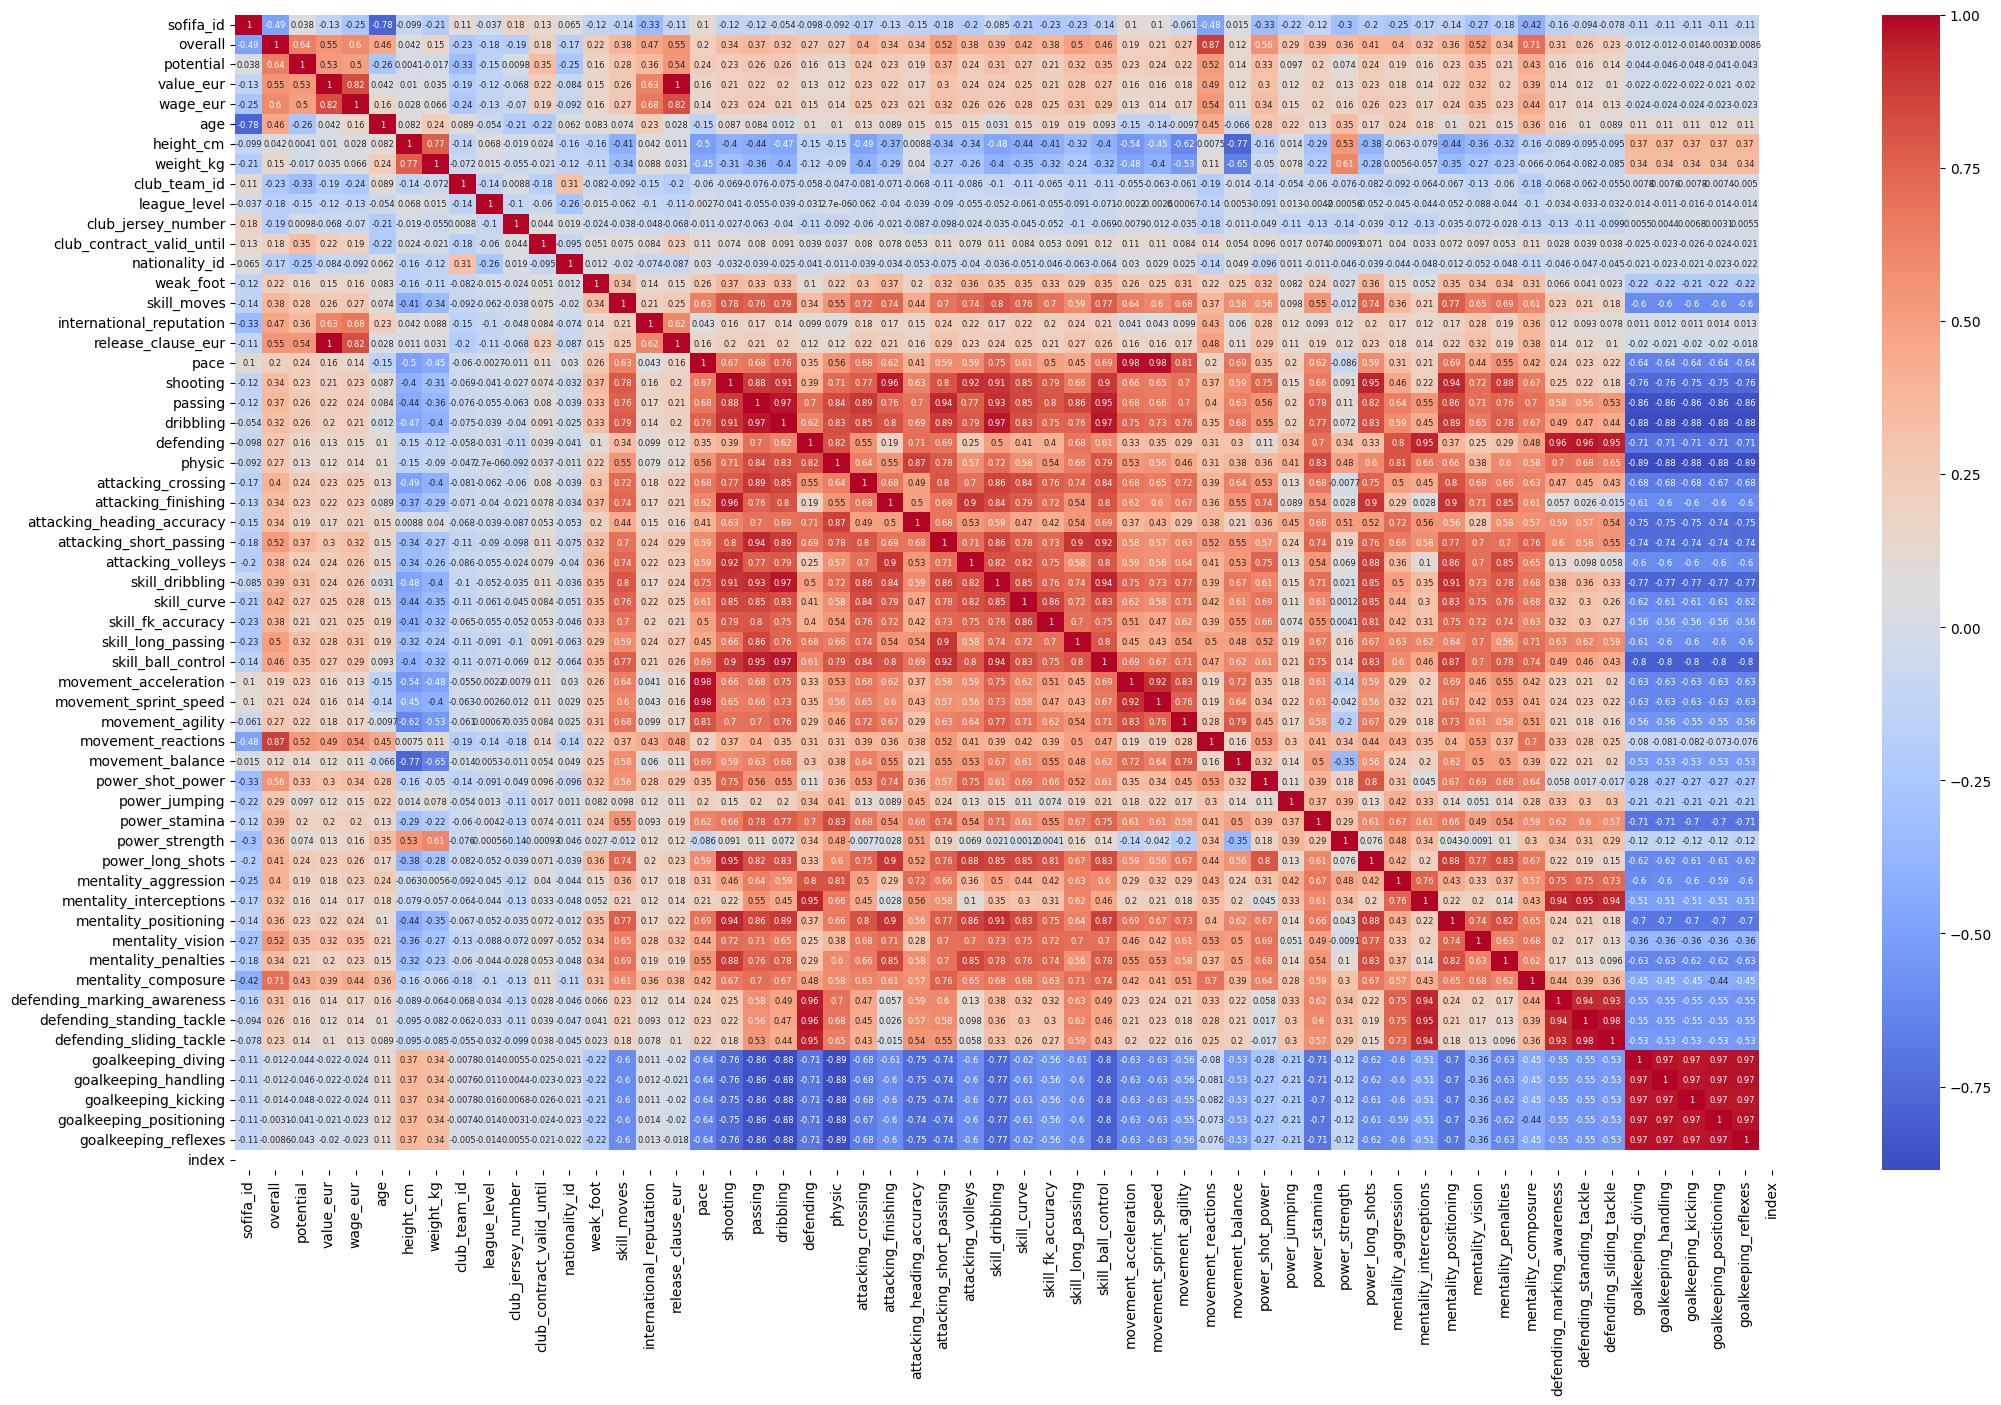

In [28]:
plt.figure(figsize=(25,15))
sns.heatmap( df_cleaned.corr(method='pearson', numeric_only=True), cmap='coolwarm', annot=True,annot_kws={"size": 6})
plt.show()

###### compression between related column

overall vs potential

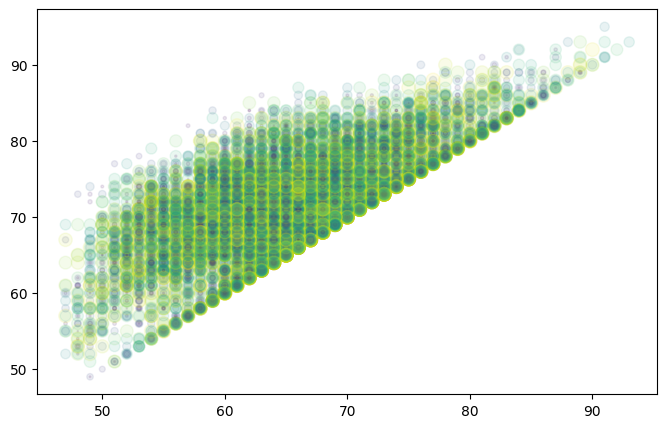

In [29]:
    plt.figure(figsize=(8,5))
    rng = np.random.RandomState(0)
    colors = rng.rand(pt.overall.count())
    sizes = 19239

    plt.scatter(pt.overall, pt.potential, c=colors,s=colors*100,  alpha=0.1,
                cmap='viridis')
    #plt.colorbar();
    plt.savefig("overall vs potential.png")

age vs potential

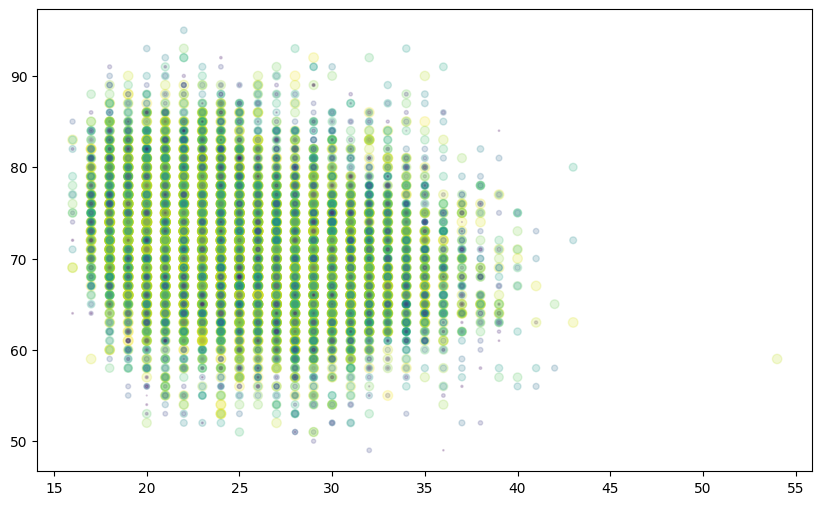

In [30]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(pt.overall.count())
    sizes = 19239

    plt.scatter(pt.age, pt.potential, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("age vs potential.png")

age vs overall

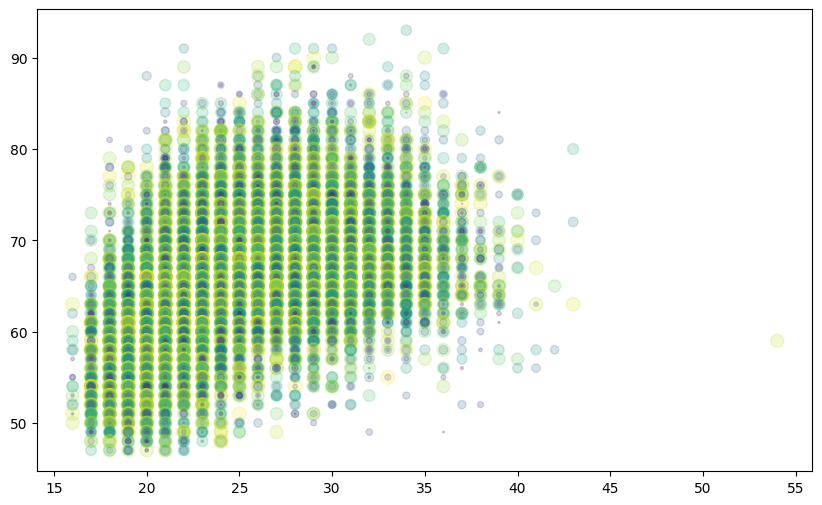

In [31]:
plt.figure(figsize=(10,6))

rng = np.random.RandomState(0)
colors = rng.rand(dp.age.count())
sizes = 19239

plt.scatter(pt.age, pt.overall,c=colors, s=colors*100, alpha=0.2,
            cmap='viridis')

#plt.colorbar()
plt.savefig("age vs overall.png")

age vs potential defrence

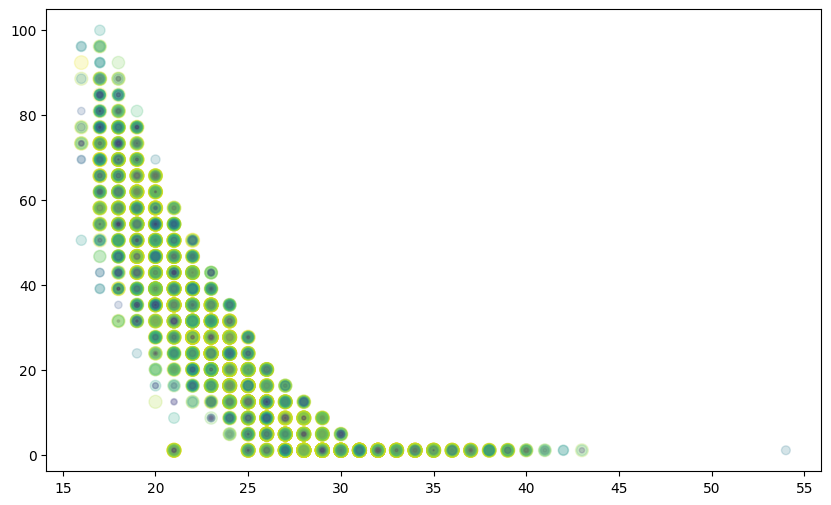

In [32]:
plt.figure(figsize=(10,6))
dpz = dp[dp['potential_defrence'] > 0]
rng = np.random.RandomState(0)
colors = rng.rand(dpz.age.count())
sizes = 19239

plt.scatter(dpz.age, dpz.potential_defrence,c=colors, s=colors*100, alpha=0.2,
            cmap='viridis')

#plt.colorbar()
plt.savefig("age vs potential_defrence.png")

wage vs value

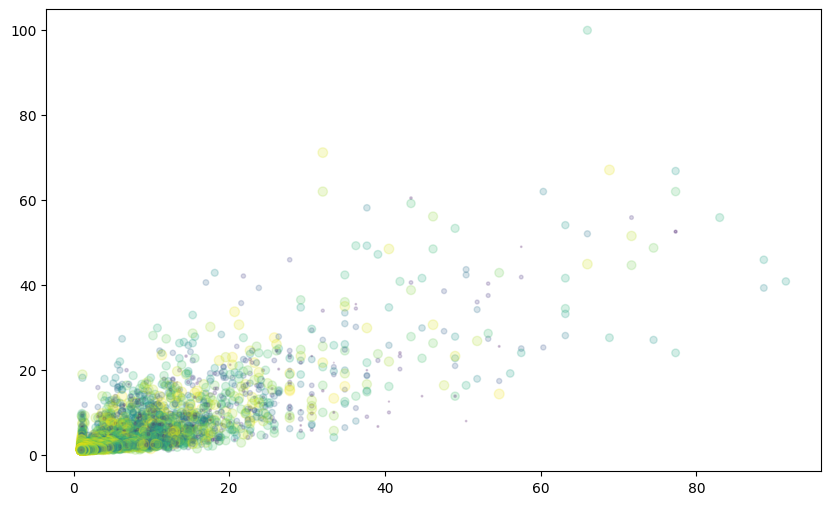

In [33]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(wv.wage.count())
    sizes = 19239

    plt.scatter(wv.wage, wv.vlaue, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("wage vs vlaue.png")

vlaue vs overall

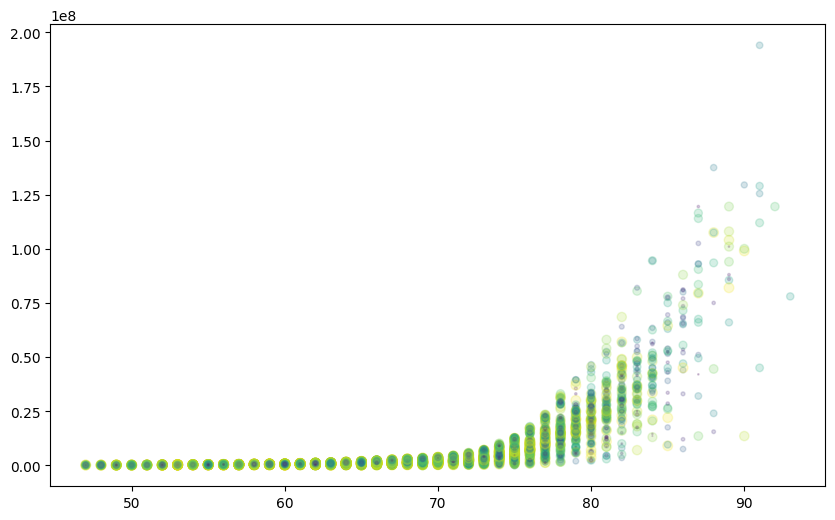

In [34]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(df_cleaned.overall.count())
    sizes = 19239

    plt.scatter(df_cleaned.overall, df_cleaned.value_eur, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("overall vs value_eur.png")

overall vs wage

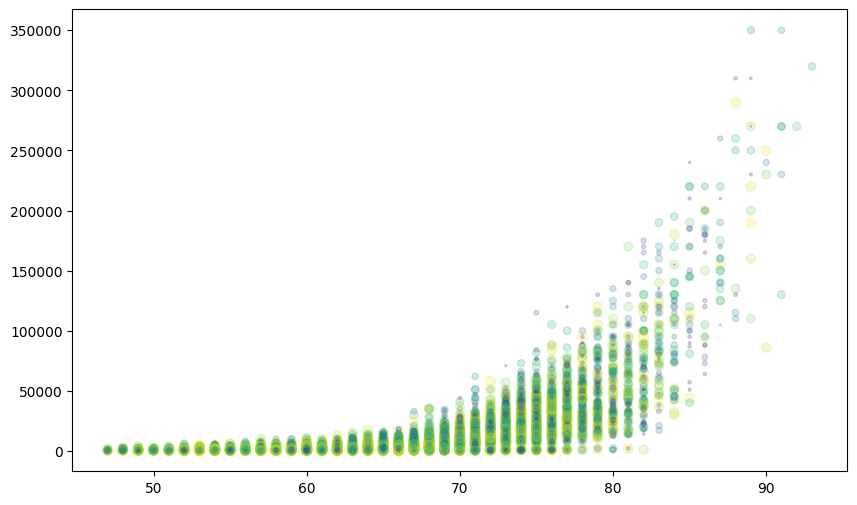

In [35]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(df_cleaned.overall.count())
    sizes = 19239

    plt.scatter(df_cleaned.overall, df_cleaned.wage_eur, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("overall vs wage_eur.png")

overall vs release clause

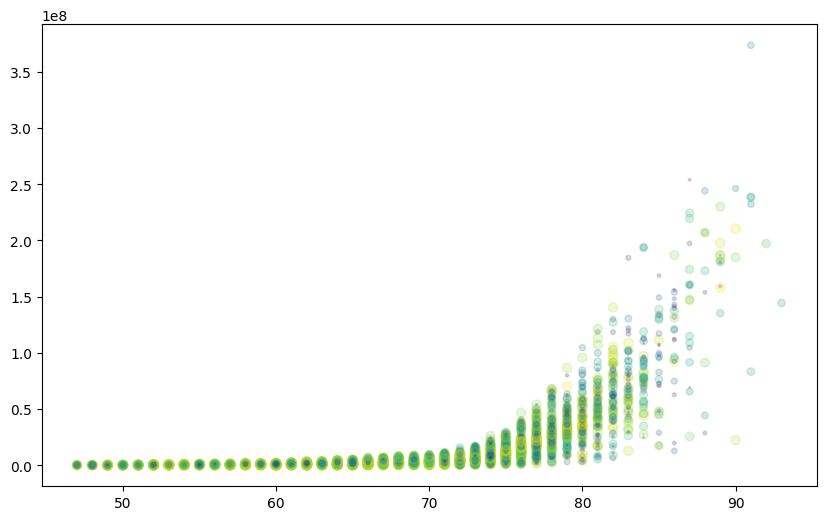

In [36]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(df_cleaned.overall.count())
    sizes = 19239

    plt.scatter(df_cleaned.overall, df_cleaned.release_clause_eur, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("overall vs release_clause_eur.png")

potential vs release clause

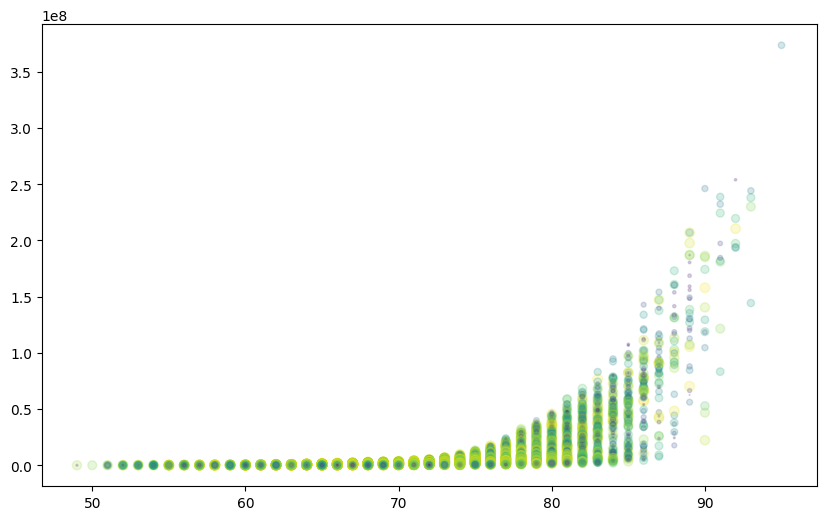

In [37]:
    plt.figure(figsize=(10,6))
    rng = np.random.RandomState(0)
    colors = rng.rand(df_cleaned.overall.count())
    sizes = 19239

    plt.scatter(df_cleaned.potential, df_cleaned.release_clause_eur, c=colors, s=colors*50, alpha=0.2,
                cmap='viridis')
    
    #plt.colorbar()
    plt.savefig("potential vs release_clause_eur.png")

In [38]:
#print(df_cleaned.release_clause_eur.mean(),df_final.release_clause_eur.mean())

###### ploting count of players based on their overall

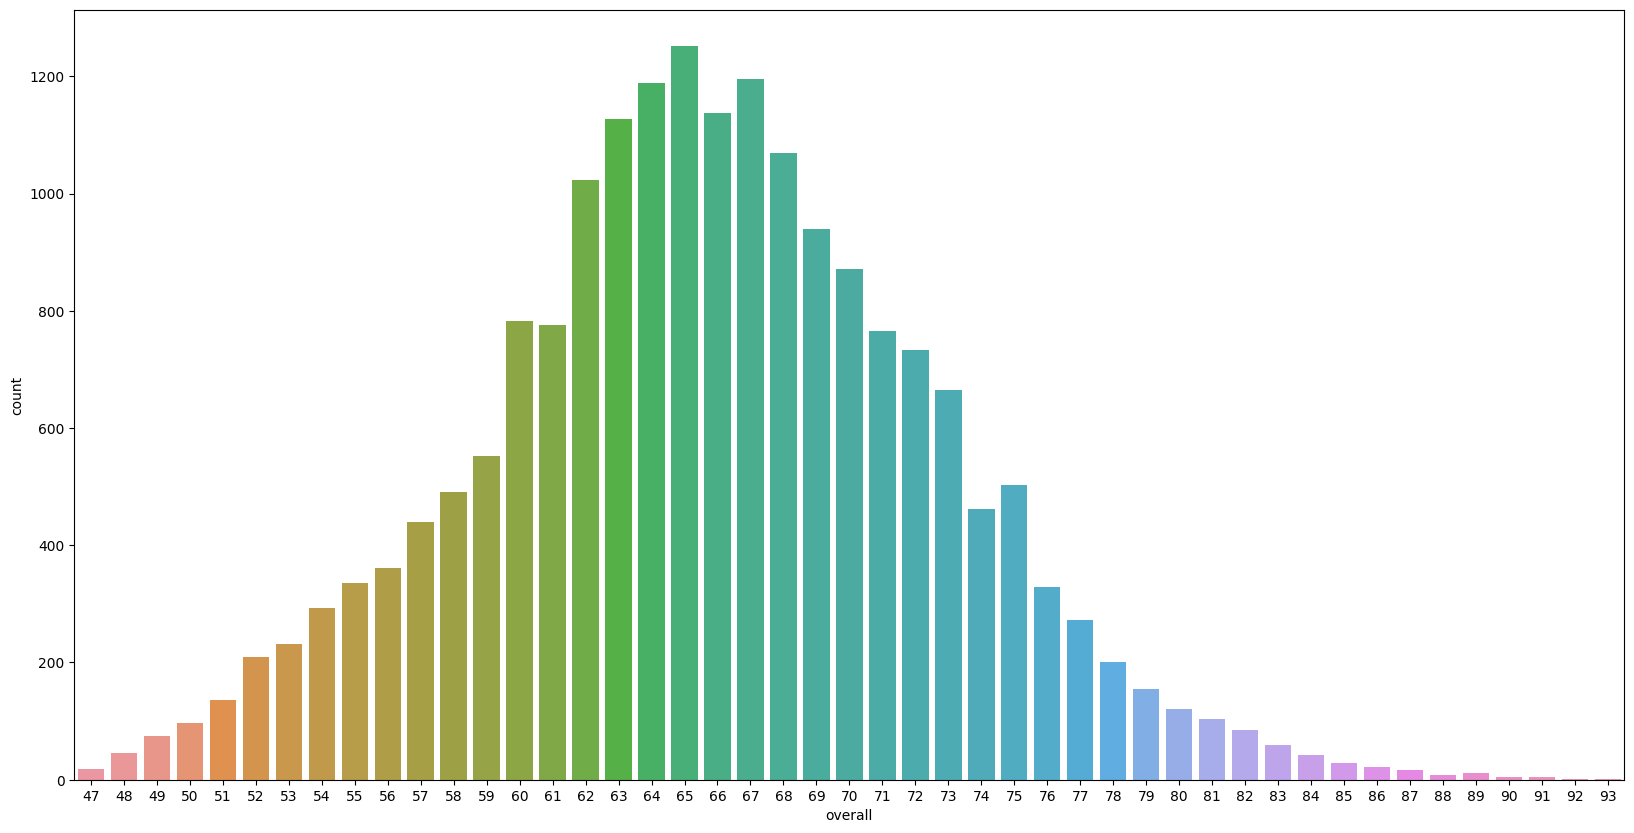

In [39]:
plt.figure(figsize=(20,10))
AX=sns.countplot(x='overall', data=df.sort_values('overall',inplace=False))
#plt.savefig("hist overall.png")
plt.show()

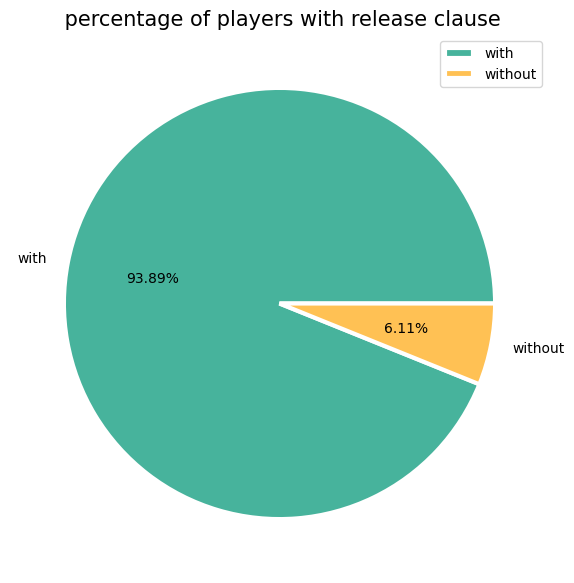

In [40]:
release_clause_lable = ['with','without']
release_clause_values = df["release_clause_eur"].isnull().value_counts() # (Right Values, Left Values)

plt.figure(figsize = (7,7))
plt.pie(release_clause_values, labels=release_clause_lable, autopct='%1.2f%%', 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors = ['#47B39C', '#FFC154']
       )
plt.title(' percentage of players with release clause',fontsize = 15)
plt.legend()
plt.savefig("percentage of release clause.png")
plt.show()


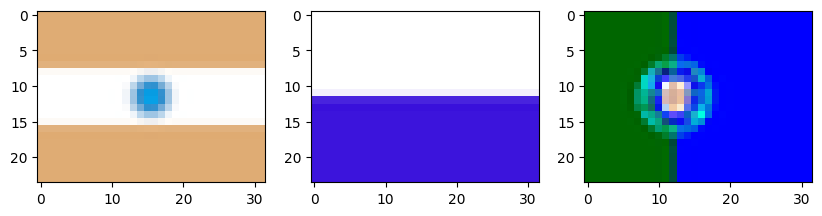

In [41]:
plt.figure(figsize=(10,10))
for i in range(0,3):
    face = nation_flag(df.iloc[i] )
    plt.subplot(131+i), plt.imshow(face)
plt.show()

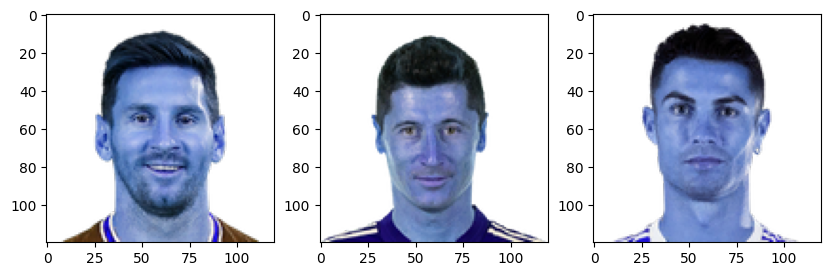

In [42]:
plt.figure(figsize=(10,10))
for i in range(0,3):
    face = player_face(df.iloc[i] )
    plt.subplot(131+i), plt.imshow(face)
plt.show()

# predicting model

###### using linear regression to predict the release clause for the players how does have it in there contract

spliting the data into modeling (traing + testing) and implementing

In [54]:
df_train = pd.DataFrame()
df_train = df_cleaned[['release_clause_eur','overall','potential','wage_eur','value_eur','age']]
df_train['index'] = df_train['release_clause_eur'].notnull()

df_imp = df_train[df_train['index'] == False ]
del df_imp ['index']
del df_imp['release_clause_eur']

df_train = df_train[df_train['index'] == True ]
del df_train['index']



C:\Users\amins\AppData\Local\Temp\ipykernel_5276\1491680955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['index'] = df_train['release_clause_eur'].notnull()


 traing the model

In [55]:
X = df_train[['overall','potential','wage_eur', 'value_eur','age']]
y = df_train['release_clause_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)


R^2: 0.9922698133882568


###### calculate the accuracy of the model

In [61]:
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)


R^2: 0.9922698133882568


In [62]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


MAE: 549267.801489092


###### predecting the nan values

In [56]:
result = df_imp

result['release_clause_eur'] = lin_reg.predict(df_imp)
result['release_clause_eur'] = result['release_clause_eur'].apply(lambda x: 0 if x < 0 else x)
result

C:\Users\amins\AppData\Local\Temp\ipykernel_5276\368382770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['release_clause_eur'] = lin_reg.predict(df_imp)
C:\Users\amins\AppData\Local\Temp\ipykernel_5276\368382770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['release_clause_eur'] = result['release_clause_eur'].apply(lambda x: 0 if x < 0 else x)


,overall,potential,wage_eur,value_eur,age,release_clause_eur
83,85,85,220000.0,53000000.0,30,1.008865e+08
163,83,83,84000.0,37000000.0,28,7.090584e+07
195,83,91,74000.0,80500000.0,23,1.555126e+08
207,82,82,155000.0,25000000.0,31,4.715703e+07
216,82,84,75000.0,26000000.0,28,4.977289e+07
...,...,...,...,...,...,...
18925,51,65,4000.0,140000.0,21,3.887034e+05
18929,51,59,2000.0,120000.0,21,7.501044e+04
18931,51,64,500.0,140000.0,20,3.631722e+05
19041,50,61,500.0,110000.0,22,2.008870e+05


copmining the result 

In [57]:
df_final = df_cleaned.combine_first(result)

# ploting the result 

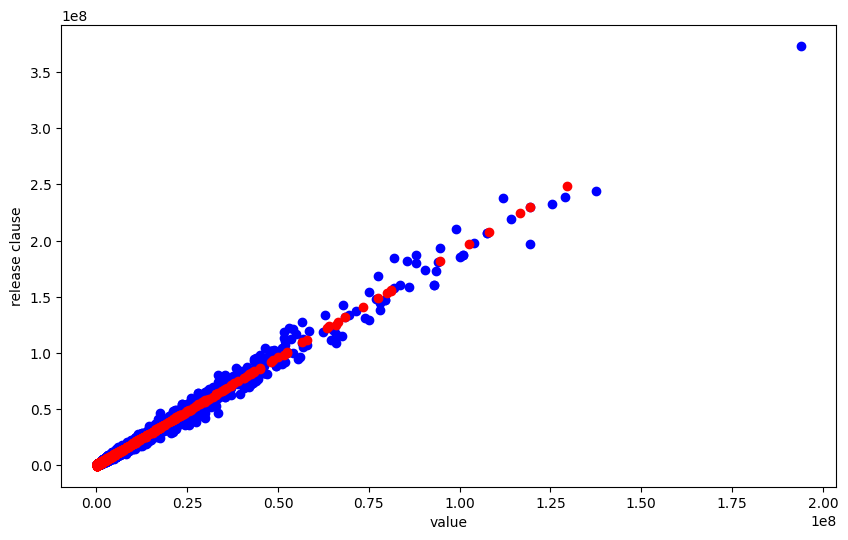

In [65]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#Plot the data points and the predictions
ax.scatter( X_train.value_eur, y_train, color='blue')
ax.scatter( X_test.value_eur, y_pred, color='red')
plt.xlabel('value')
plt.ylabel("release clause")
plt.savefig("value vs release clause.png")

plt.show()

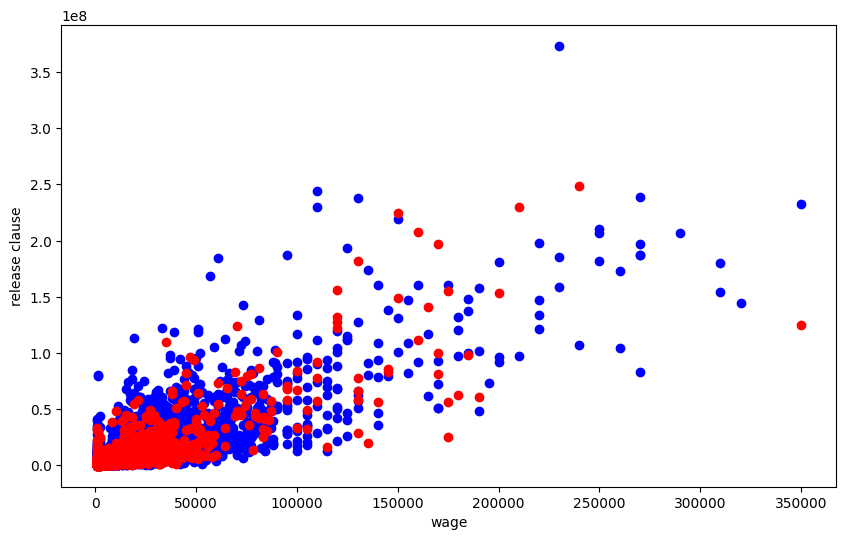

In [66]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# Plot the data points and the predictions
ax.scatter( X_train.wage_eur, y_train, color='blue')
ax.scatter( X_test.wage_eur, y_pred, color='red')
plt.xlabel('wage')
plt.ylabel("release clause")
plt.savefig("wage vs release clause.png")

plt.show()

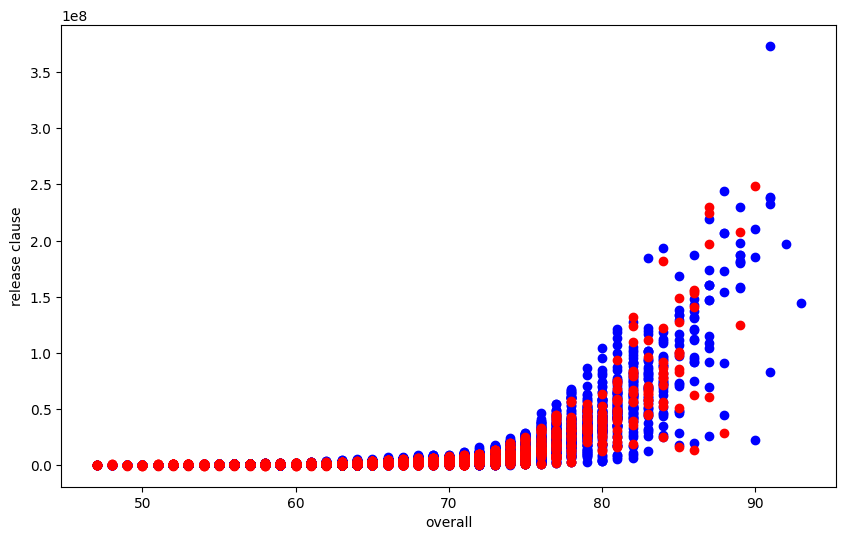

In [67]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# Plot the data points and the predictions
ax.scatter( X_train.overall, y_train, color='blue')
ax.scatter( X_test.overall, y_pred, color='red')
plt.xlabel('overall')
plt.ylabel("release clause")
plt.savefig("overall vs release clause.png")

plt.show()

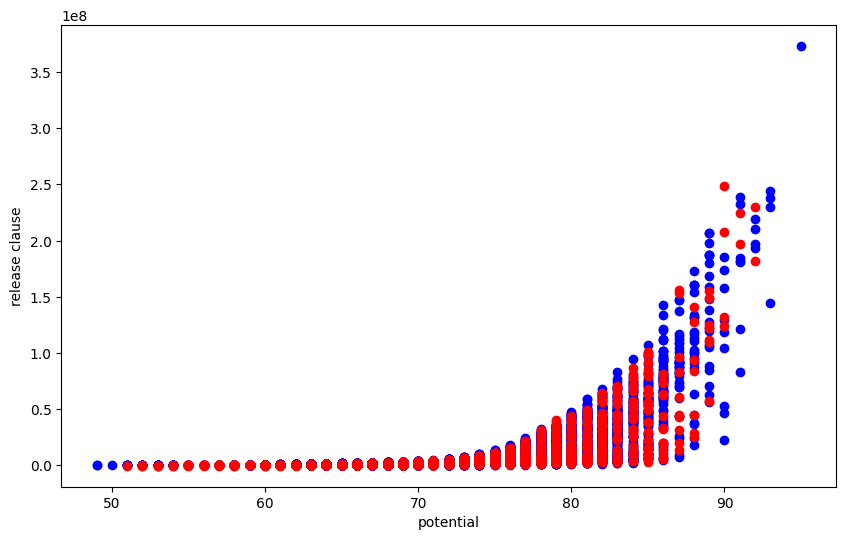

In [68]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# Plot the data points and the predictions
ax.scatter( X_train.potential, y_train, color='blue')
ax.scatter( X_test.potential, y_pred, color='red')
plt.xlabel('potential')
plt.ylabel("release clause")
plt.savefig("potential vs release clause.png")

plt.show()

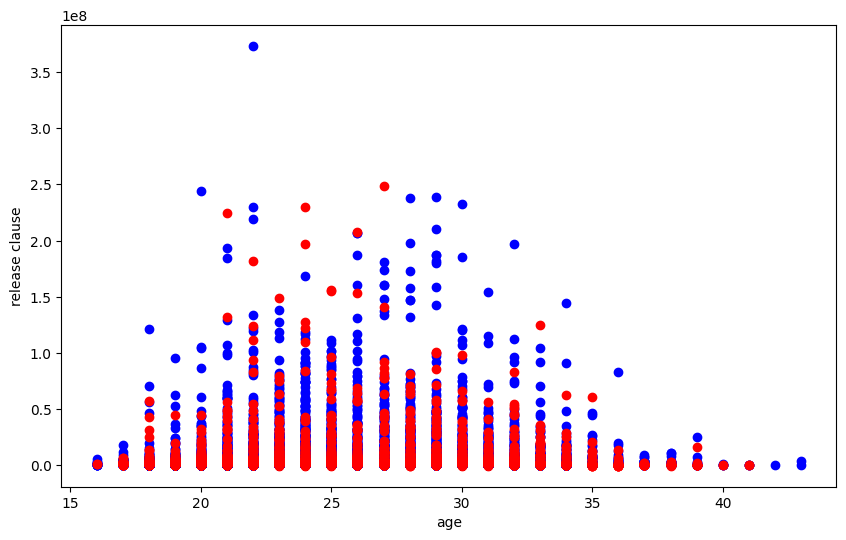

In [69]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# Plot the data points and the predictions
ax.scatter( X_train.age, y_train, color='blue')
ax.scatter( X_test.age, y_pred, color='red')
plt.xlabel('age')
plt.ylabel("release clause")
plt.savefig("age vs release clause.png")

plt.show()